<a href="https://colab.research.google.com/github/nicoyogis/CNN_MAIZE/blob/main/FIX_ML_model_1%2C_2_dan_3_webmail_(70_30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import os  # Create directories, list files
import zipfile
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import time

In [ ]:
Train70 = "/content/drive/MyDrive/projek/dataset_split_70_30/train"
Val30 = "/content/drive/MyDrive/projek/dataset_split_70_30/val"
Target70 = "/content/drive/MyDrive/projek/dataset_split_70_30"
Source = "/content/drive/MyDrive/projek/dataset"

In [ ]:
#!pip install split_folders
#import splitfolders

In [ ]:
#splitfolders.ratio(input=Source, output=Target70, seed=1337, ratio=(0.7, 0.3))

Copying files: 2000 files [00:47, 42.20 files/s]


# LOAD MANUAL 70-30

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(Train70):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
val_data = []
val_label = []
for r, d, f in os.walk(Val30):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    
  #  shear_range = 0.2,
  #  zoom_range=0.2,
  #  horizontal_flip=True,
     vertical_flip=True,
  #  rotation_range=20,
  #  width_shift_range=0.2,
  #  height_shift_range=0.2,
   # rescale = 1./255,
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, horizontal_flip=True, 
    
)

val_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# train_generator = train_gen.flow_from_directory(
#     Train,
#     target_size=(150, 150),
#     class_mode='categorical',
#     color_mode="rgb",
#     batch_size=64
# )

# validation_generator = val_gen.flow_from_directory(
#     Val,
#     target_size=(150,150),
#     class_mode='categorical',
#     color_mode="rgb",
#     shuffle=False,
#     batch_size=64
# )

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1400, 150, 150, 3)
Train Label =  (1400,)
Validation Data =  (600, 150, 150, 3)
Validation Label =  (600,)


In [ ]:
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

In [ ]:
y_train = to_categorical(y_train, 4)
y_val = to_categorical(y_val, 4)

In [ ]:
train_gen.fit(x_train)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1400, 150, 150, 3)
(600, 150, 150, 3)
(1400, 4)
(600, 4)


## Model 1

In [ ]:
model= Sequential()

model.add(InputLayer(input_shape=[150,150,3]))

model.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

  # Fully Connected Layer
model.add(Dense(128, activation='relu')) #hidden
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0002),
            metrics=['accuracy'])

In [ ]:
H = model.fit(train_gen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data = (x_val, y_val))

Epoch 1/100
44/44 [==============================] - 21s 194ms/step - loss: 1.5645 - accuracy: 0.3950 - val_loss: 1.3948 - val_accuracy: 0.2500
Epoch 2/100
44/44 [==============================] - 8s 180ms/step - loss: 0.9146 - accuracy: 0.5950 - val_loss: 1.4259 - val_accuracy: 0.2500
Epoch 3/100
44/44 [==============================] - 8s 183ms/step - loss: 0.7401 - accuracy: 0.6807 - val_loss: 1.3989 - val_accuracy: 0.4683
Epoch 4/100
44/44 [==============================] - 8s 185ms/step - loss: 0.6479 - accuracy: 0.7179 - val_loss: 1.4072 - val_accuracy: 0.3833
Epoch 5/100
44/44 [==============================] - 8s 184ms/step - loss: 0.5774 - accuracy: 0.7514 - val_loss: 1.3951 - val_accuracy: 0.4600
Epoch 6/100
44/44 [==============================] - 8s 185ms/step - loss: 0.5522 - accuracy: 0.7393 - val_loss: 1.3437 - val_accuracy: 0.4683
Epoch 7/100
44/44 [==============================] - 8s 188ms/step - loss: 0.5272 - accuracy: 0.7636 - val_loss: 1.1515 - val_accuracy: 0.488

In [ ]:
#model 1
y_val_hat1 = model.predict(x_val, batch_size=32)
y_val_hat1 = np.argmax(y_val_hat1, axis=1)
y_val = np.argmax(y_val, axis=1)

In [ ]:
clas_r = classification_report(y_val, y_val_hat1)
# print classification report
print('Classification report on test data')
print(clas_r)

Classification report on test data
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       150
           1       1.00      1.00      1.00       150
           2       1.00      0.99      1.00       150
           3       0.96      0.88      0.92       150

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



Text(0.5, 0.5, 'Predicted labels')

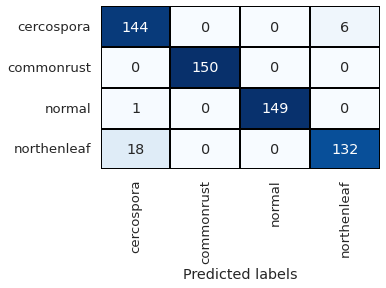

In [ ]:
# calculate confusion matrix & classification report model 1
import seaborn as sns
conf_m = confusion_matrix(y_val, y_val_hat1)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['cercospora', 'commonrust','normal','northenleaf'], yticklabels=['cercospora', 'commonrust','normal','northenleaf'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model'

# simpan history model kedua
history_dict = H.history
json.dump(history_dict, open(target_dir + '/history_96_model1_T70_V30.json', 'w'))

# simpan model kedua dan weight-nya
model.save(target_dir + '/96_model1_T70_V30.h5')
model.save_weights(target_dir + '/weights_96_model1_T70_V30.h5')

## Model 2

In [ ]:
modell= Sequential()

modell.add(InputLayer(input_shape=[150,150,3]))

modell.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell.add(BatchNormalization())
modell.add(MaxPool2D(pool_size=2, padding='same'))

modell.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell.add(BatchNormalization())
modell.add(MaxPool2D(pool_size=2, padding='same'))

modell.add(Conv2D(filters=32, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell.add(BatchNormalization())
modell.add(MaxPool2D(pool_size=2, padding='same'))

modell.add(Conv2D(filters=64, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell.add(BatchNormalization())
modell.add(MaxPool2D(pool_size=2, padding='same'))

modell.add(Flatten())

  # Fully Connected Layer
modell.add(Dense(128, activation='relu')) #hidden
modell.add(Dropout(0.5))
modell.add(Dense(256, activation='relu'))
modell.add(Dropout(0.5))
modell.add(Dense(256, activation='relu'))
modell.add(Dropout(0.5))
modell.add(Dense(4, activation='softmax'))  


In [ ]:
# Compile the model
modell.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0002),
            metrics=['accuracy'])

In [ ]:
HH = modell.fit(train_gen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data = (x_val, y_val))

Epoch 1/100
44/44 [==============================] - 10s 197ms/step - loss: 1.4487 - accuracy: 0.4171 - val_loss: 1.4512 - val_accuracy: 0.2500
Epoch 2/100
44/44 [==============================] - 8s 188ms/step - loss: 1.0120 - accuracy: 0.5614 - val_loss: 2.0666 - val_accuracy: 0.2500
Epoch 3/100
44/44 [==============================] - 8s 188ms/step - loss: 0.7837 - accuracy: 0.6557 - val_loss: 2.9863 - val_accuracy: 0.2500
Epoch 4/100
44/44 [==============================] - 8s 190ms/step - loss: 0.7013 - accuracy: 0.6800 - val_loss: 3.3850 - val_accuracy: 0.2500
Epoch 5/100
44/44 [==============================] - 8s 186ms/step - loss: 0.6466 - accuracy: 0.7093 - val_loss: 2.9401 - val_accuracy: 0.2500
Epoch 6/100
44/44 [==============================] - 8s 189ms/step - loss: 0.5558 - accuracy: 0.7414 - val_loss: 1.7361 - val_accuracy: 0.4700
Epoch 7/100
44/44 [==============================] - 8s 187ms/step - loss: 0.5173 - accuracy: 0.7707 - val_loss: 1.2242 - val_accuracy: 0.423

In [ ]:
#model 1
y_val_hat1 = modell.predict(x_val, batch_size=32)
y_val_hat1 = np.argmax(y_val_hat1, axis=1)
y_val = np.argmax(y_val, axis=1)

In [ ]:
clas_r = classification_report(y_val, y_val_hat1)
# print classification report
print('Classification report on test data')
print(clas_r)

Classification report on test data
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150
           3       0.89      0.91      0.90       150

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



Text(0.5, 0.5, 'Predicted labels')

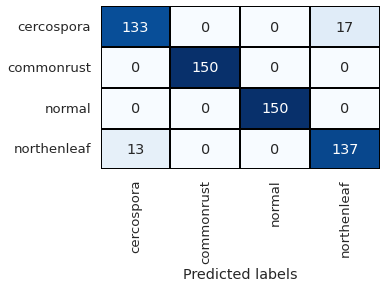

In [ ]:
# calculate confusion matrix & classification report model 1
import seaborn as sns
conf_m = confusion_matrix(y_val, y_val_hat1)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['cercospora', 'commonrust','normal','northenleaf'], yticklabels=['cercospora', 'commonrust','normal','northenleaf'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model'

# simpan history model kedua
history_dict = HH.history
json.dump(history_dict, open(target_dir + '/history_95_model2_T70_V30.json', 'w'))

# simpan model kedua dan weight-nya
modell.save(target_dir + '/95_model2_T70_V30.h5')
modell.save_weights(target_dir + '/weights_95_model2_T70_V30.h5')

## Model 3

In [ ]:
modelll= Sequential()

modelll.add(InputLayer(input_shape=[150,150,3]))

modelll.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=32, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=64, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=128, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=256, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))
modelll.add(Flatten())

modelll.add(Flatten())

  # Fully Connected Layer
modelll.add(Dense(128, activation='relu')) #hidden
modelll.add(Dropout(0.5))
modelll.add(Dense(256, activation='relu'))
modelll.add(Dropout(0.5))
modelll.add(Dense(256, activation='relu'))
modelll.add(Dropout(0.5))
modelll.add(Dense(4, activation='softmax'))  


In [ ]:
# Compile the model
modelll.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0002),
            metrics=['accuracy'])

In [ ]:
HHH = modelll.fit(train_gen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data = (x_val, y_val))

Epoch 1/100
44/44 [==============================] - 10s 192ms/step - loss: 1.4941 - accuracy: 0.3907 - val_loss: 1.3900 - val_accuracy: 0.2500
Epoch 2/100
44/44 [==============================] - 8s 183ms/step - loss: 1.0464 - accuracy: 0.5407 - val_loss: 1.5452 - val_accuracy: 0.2500
Epoch 3/100
44/44 [==============================] - 8s 183ms/step - loss: 0.7766 - accuracy: 0.6743 - val_loss: 2.2611 - val_accuracy: 0.2500
Epoch 4/100
44/44 [==============================] - 8s 182ms/step - loss: 0.6419 - accuracy: 0.7250 - val_loss: 3.1884 - val_accuracy: 0.2500
Epoch 5/100
44/44 [==============================] - 8s 183ms/step - loss: 0.5511 - accuracy: 0.7536 - val_loss: 4.4381 - val_accuracy: 0.2500
Epoch 6/100
44/44 [==============================] - 8s 183ms/step - loss: 0.5569 - accuracy: 0.7400 - val_loss: 3.3318 - val_accuracy: 0.2500
Epoch 7/100
44/44 [==============================] - 8s 188ms/step - loss: 0.4845 - accuracy: 0.7921 - val_loss: 2.7473 - val_accuracy: 0.278

In [ ]:
#model 1
y_val_hat1 = modelll.predict(x_val, batch_size=32)
y_val_hat1 = np.argmax(y_val_hat1, axis=1)
y_val = np.argmax(y_val, axis=1)

In [ ]:
clas_r = classification_report(y_val, y_val_hat1)
# print classification report
print('Classification report on test data')
print(clas_r)

Classification report on test data
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       150
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150
           3       0.99      0.74      0.85       150

    accuracy                           0.93       600
   macro avg       0.95      0.93      0.93       600
weighted avg       0.95      0.93      0.93       600



Text(0.5, 0.5, 'Predicted labels')

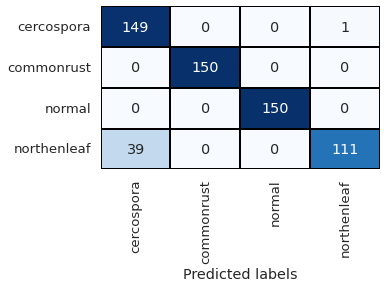

In [ ]:
# calculate confusion matrix & classification report model 1
import seaborn as sns
conf_m = confusion_matrix(y_val, y_val_hat1)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['cercospora', 'commonrust','normal','northenleaf'], yticklabels=['cercospora', 'commonrust','normal','northenleaf'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model'

# simpan history model kedua
history_dict = HHH.history
json.dump(history_dict, open(target_dir + '/history_93_model3_T70_V30.json', 'w'))

# simpan model kedua dan weight-nya
modelll.save(target_dir + '/93_model3_T70_V30.h5')
modelll.save_weights(target_dir + '/weights_93_model3_T70_V30.h5')

# K FOLD Model 3

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy
#optimizer = SGD()
loss_function = categorical_crossentropy

In [ ]:
acc_per_fold = []
loss_per_fold = []

In [ ]:
X=np.array(x_train)

In [ ]:
Y=np.array(y_train)

In [ ]:
opt2=Adam(learning_rate=0.0002)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
 # Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, val in kfold.split(X):

  model2 = Sequential()

  model2.add(InputLayer(input_shape=[150,150,3]))

  model2.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))
  model2.add(Flatten())

  # Fully Connected Layer
  model2.add(Dense(128, activation='relu')) #hidden
  model2.add(Dropout(0.5))
  model2.add(Dense(256, activation='relu'))
  model2.add(Dropout(0.5))
  model2.add(Dense(256, activation='relu'))
  model2.add(Dropout(0.5))
  model2.add(Dense(4, activation='softmax'))  

  # Compile the model
  model2.compile(loss=loss_function,
                optimizer=opt2,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
 
  # Fit data to model
  history =  model2.fit(train_gen.flow(X[train], Y[train],
              batch_size=32),
              epochs=100,
              verbose=1,validation_data=(X[val], Y[val]))

  # Generate generalization metrics
  scores = model2.evaluate(X[val], Y[val], verbose=1)
  print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # y_predict = model2.predict(X[val])
  # y=np.asarray(Y[val])
  # yval=np.argmax(y, axis=1)
  # y_predict_labels= np.argmax(y_predict,axis=1)

  # acc = accuracy_score(y_predict_labels, yval)
  # prec = precision_score(y_predict_labels, yval,average='weighted')
  # rec = recall_score(y_predict_labels, yval,average='weighted')
  # f1_score = f1_score(y_predict_labels, yval,average='weighted')

  # print("ACC = " ,acc)
  # print("PRECISION = ",prec)
  # print("RECALL = ",rec)
  # print("F1SCORE = ",f1_score)


  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
40/40 [==============================] - 22s 154ms/step - loss: 1.4759 - accuracy: 0.3849 - val_loss: 1.3861 - val_accuracy: 0.2500
Epoch 2/100
40/40 [==============================] - 6s 149ms/step - loss: 0.9537 - accuracy: 0.5913 - val_loss: 1.4369 - val_accuracy: 0.2500
Epoch 3/100
40/40 [==============================] - 6s 150ms/step - loss: 0.7401 - accuracy: 0.6627 - val_loss: 1.5222 - val_accuracy: 0.2500
Epoch 4/100
40/40 [==============================] - 6s 149ms/step - loss: 0.6334 - accuracy: 0.7230 - val_loss: 1.5203 - val_accuracy: 0.2500
Epoch 5/100
40/40 [==============================] - 6s 152ms/step - loss: 0.5542 - accuracy: 0.7556 - val_loss: 1.6933 - val_accuracy: 0.2500
Epoch 6/100
40/40 [==============================] - 6s 149ms/step - loss: 0.5470 - accuracy: 0.7341 - val_loss: 1.9702 - val_accuracy: 0.2500
Epoch 7/100
40/40 [=========================

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model'

# simpan history model kedua
history_dict = history.history
json.dump(history_dict, open(target_dir + '/history_model1_crossval_94.42_T70_V30.json', 'w'))

# simpan model kedua dan weight-nya
model2.save(target_dir + '/model1_crossval_94.42_T70_V30.h5')
model2.save_weights(target_dir + '/weights_model1_crossval_94.42_T70_V30.h5')